### Heart Failure Prediction

##### Importing libraries

In [1]:
import pandas 
import matplotlib.pyplot
import seaborn

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pandas.read_csv('D:\ML-Projects\Heart failure Prediction\Dataset\heart_failure_clinical_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [5]:
df.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### Divding the data into input and target features

In [7]:
X = df.drop(columns= ['DEATH_EVENT'])
Y = df['DEATH_EVENT']

In [8]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50


In [9]:
Y

0       0
1       0
2       0
3       0
4       1
       ..
4995    0
4996    0
4997    1
4998    1
4999    0
Name: DEATH_EVENT, Length: 5000, dtype: int64

##### Data Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [11]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.272727,0,0.092498,0,0.469697,0,0.288833,0.089888,0.685714,1,1,0.298932
1,0.454545,0,0.004210,0,0.166667,0,0.339314,0.505618,0.485714,1,0,0.722420
2,0.090909,0,0.071319,1,0.363636,0,0.356286,0.044944,0.771429,0,0,0.854093
3,0.363636,1,0.093264,1,0.393939,1,0.367196,0.078652,0.371429,1,0,0.306050
4,1.000000,1,0.071319,0,0.242424,0,0.528428,0.168539,0.542857,1,0,0.163701


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape

((4000, 12), (1000, 12))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [15]:
def kfold(estimator, input, target):
    return cross_val_score(estimator, input, target).mean() * 100

In [16]:
kfold(LogisticRegression(),X_train, Y_train)

85.25

In [17]:
kfold(SVC(), X_train, Y_train)

89.525

In [18]:
kfold(RandomForestClassifier(), X_train, Y_train)

99.25

In [19]:
clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [3, 5, 7],
    'min_samples_split' :[2, 3, 4]
})

clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [20]:
clf_df = pandas.DataFrame(clf.cv_results_)

In [21]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [22]:
clf_df[['param_max_depth', 'param_min_samples_split', 'param_n_estimators','mean_test_score']].sort_values(by= 'mean_test_score', ascending=False)

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
24,7,4,50,0.98150
21,7,3,50,0.98025
23,7,3,150,0.97975
18,7,2,50,0.97900
20,7,2,150,0.97900
25,7,4,100,0.97875
19,7,2,100,0.97800
22,7,3,100,0.97750
26,7,4,150,0.97650
12,5,3,50,0.95075


In [23]:
model = RandomForestClassifier(n_jobs=1,
                               n_estimators=50,
                               max_depth=7,
                               min_samples_split=3
                               )

model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=50,
                       n_jobs=1)

In [24]:
Y_test[:5]

1501    0
2586    1
2653    1
1055    1
705     0
Name: DEATH_EVENT, dtype: int64

In [25]:
pred = model.predict(X_test)
pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [26]:
accuracy_score(Y_test, pred) * 100

97.39999999999999

In [27]:
recall_score(Y_test, pred) * 100

93.37748344370861

In [28]:
precision_score(Y_test, pred) * 100

97.91666666666666

In [29]:
f1_score(Y_test, pred) * 100

95.59322033898306

In [30]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       698
           1       0.98      0.93      0.96       302

    accuracy                           0.97      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.97      0.97      0.97      1000



Text(50.722222222222214, 0.5, 'Actual')

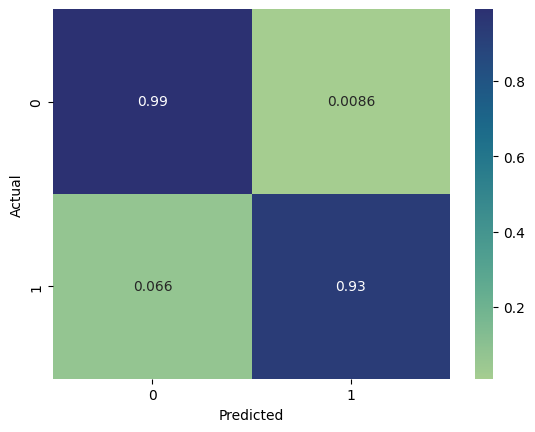

In [31]:
cf = confusion_matrix(Y_test, pred, normalize='true')

seaborn.heatmap(cf, annot = True, cmap='crest')

matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')